# Exercise 3
Representation of the cluster in terms of the most common music genres found

## 1. Load BFR cluster assignments

In [14]:
import json
import pandas as pd

with open("./output/C2/bfr_results.json", "r") as f:
    bfr_clusters = json.load(f)

# Flatten all assignments to a DataFrame
track_cluster_pairs = []

for cluster_id, track_ids in bfr_clusters["DS"].items():
    for tid in track_ids:
        track_cluster_pairs.append((int(tid), f"DS_{cluster_id}"))

for cluster_id, track_ids in bfr_clusters["CS"].items():
    for tid in track_ids:
        track_cluster_pairs.append((int(tid), f"CS_{cluster_id}"))

# RS to track unassigned points
for idx, tid in bfr_clusters["RS"].items():
    track_cluster_pairs.append((int(tid), "RS"))

assignments_df = pd.DataFrame(track_cluster_pairs, columns=["track_id", "cluster"])


## 2. Load genre metadata from tracks.csv

In [15]:
tracks_df = pd.read_csv("./fma_metadata/tracks.csv", header=[0, 1], index_col=0)
track_genres = tracks_df[("track", "genre_top")].dropna()
track_genres.index = track_genres.index.astype(int)
track_genres.name = "genre"

## 3. Merge assignments with genres

In [16]:
assignments_df = assignments_df.merge(track_genres, how="left", left_on="track_id", right_index=True)
assignments_df.dropna(subset=["genre"], inplace=True)

## 4. Group and summarize clusters by top genre

In [17]:
# Top genre per cluster
genre_summary = assignments_df.groupby("cluster")["genre"].agg(lambda x: x.value_counts().idxmax()).reset_index()

# Distribution of genres per cluster
genre_counts = assignments_df.groupby(["cluster", "genre"]).size().reset_index(name="count")
genre_distribution = genre_counts.pivot(index="cluster", columns="genre", values="count").fillna(0)

display(genre_summary)

,cluster,genre
0,CS_CS_0,Experimental
1,CS_CS_2,Rock
2,DS_0,Rock
3,DS_1,Rock
4,DS_2,Electronic
5,DS_3,Rock
6,DS_4,Experimental
7,DS_5,Rock
8,DS_6,Experimental
9,DS_7,Experimental


## 5. Visualize genre distribution as heatmap

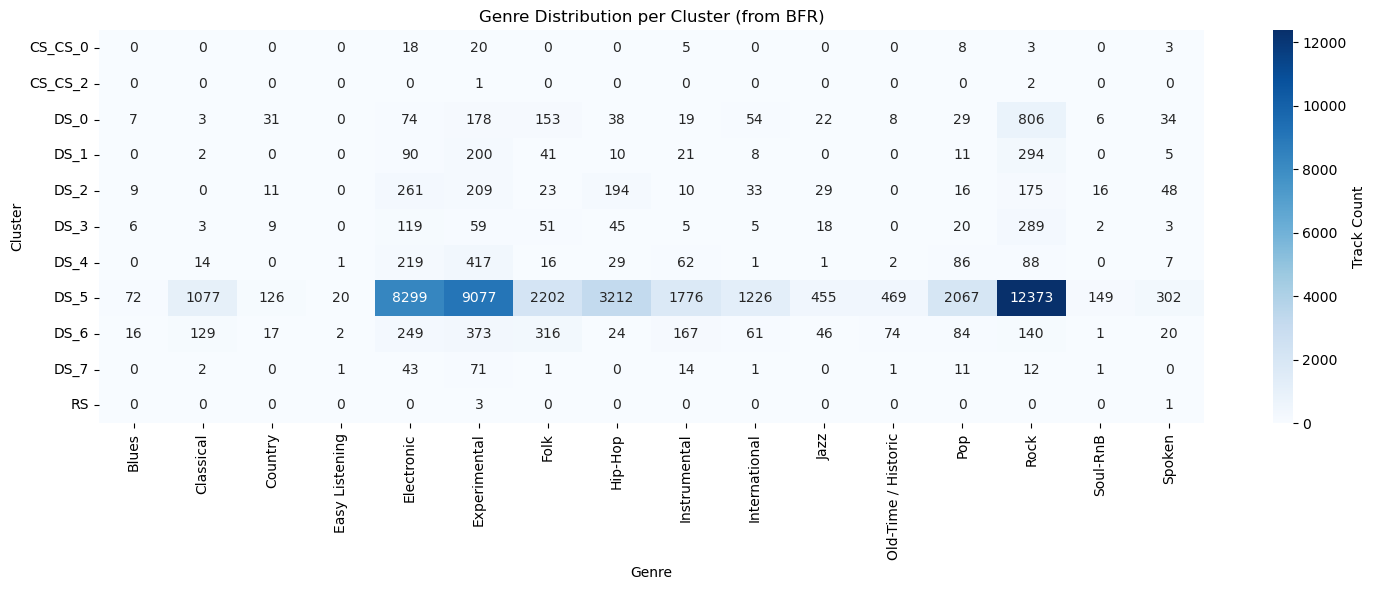

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.heatmap(genre_distribution, cmap="Blues", annot=True, fmt=".0f", cbar_kws={"label": "Track Count"})
plt.title("Genre Distribution per Cluster (from BFR)")
plt.ylabel("Cluster")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()

## 6. Save Results

In [19]:
genre_summary.to_csv("./output/C3/bfr_genre_summary.csv", index=False)
assignments_df.to_csv("./output/C3/bfr_track_assignments_with_genres.csv", index=False)